# <center> Multi-Layered Perceptron from scratch 

In [30]:
# Import important Libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [31]:
class MLP:
    
    def __init__(self, n_inputs, n_outputs, hidden_sizes=[30]):
        self.nx = n_inputs
        self.ny = n_outputs
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny] 

        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_sigmoid(self, x):
        return x*(1-x) 
  
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps)

    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
        self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
        return self.H[self.nh+1]
  
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
  
    def cross_entropy(self,label,pred):          # error function
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
 
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
    def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
        if display_loss:
            loss = {}
      
        if initialize:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.random.randn(1, self.sizes[i+1])
        
        for epoch in tqdm(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]

            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * (dW[i+1]/m)
                self.B[i+1] -= learning_rate * (dB[i+1]/m)

            if display_loss:
                Y_pred = self.predict(X) 
                loss[epoch] = self.cross_entropy(Y, Y_pred)

        if display_loss:
            plt.title('Training Loss',fontweight="bold")
            plt.plot(list(range(epochs)),list(loss.values()),'b-')
            plt.xlabel('Epochs')
            plt.ylabel('Error')
            plt.show()

In [78]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.matrix(y_train).T
y_test = np.matrix(y_test).T

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = onehotencoder.fit_transform(y_train).toarray()
X_test = scaler.fit_transform(X_test)
y_test = onehotencoder.fit_transform(y_test).toarray()

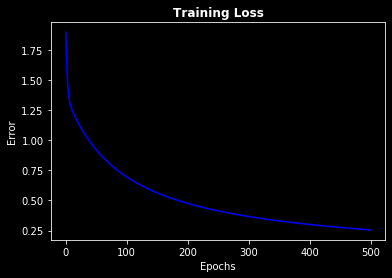

In [81]:
mlp = MLP(X_train.shape[1],y_train.shape[1],[30])
mlp.fit(X_train,y_train,epochs=500,learning_rate=0.005,display_loss=True)

In [82]:
mlp.W

{1: array([[-0.52594489, -2.96613331, -0.72159648,  0.34967041, -0.71843938,
          0.54901815,  0.2281507 ,  1.66923411,  1.14863841, -1.29704766,
          0.30952298,  0.42796229,  0.12053616, -0.69275439, -0.2801121 ,
          0.47004402,  1.07946354, -0.45102283, -0.97089253,  0.48462961,
          0.61070052,  0.57217727,  1.06574731,  0.07137836, -0.45801813,
          1.41562936, -0.54065847,  0.46494506,  0.00835289,  0.69258986],
        [-0.37977712,  0.44925769, -1.24619586,  0.46964732, -2.40763732,
          0.13117126,  2.05025952, -0.92922545, -1.74076852, -1.21250557,
          0.86439725,  0.38813611,  1.20677266, -1.93875676, -0.09500441,
          1.28624541, -0.13552461, -1.648093  ,  0.8325286 ,  0.57175664,
          1.10033538,  0.98029342, -0.64991422, -1.66976577, -1.20334201,
         -1.26301659, -1.53112284,  1.77987768, -3.17880168,  1.16673641],
        [ 0.38547143,  1.85381909,  0.40526981,  0.09058137,  1.18670588,
          2.6345604 ,  0.48117074

In [83]:
from sklearn.metrics import accuracy_score

y_pred_train = mlp.predict(np.asarray(X_train))
y_pred_train = np.argmax(y_pred_train,1)
y_train = np.argmax(y_train,1)

y_pred_test = mlp.predict(np.asarray(X_test))
y_pred_test = np.argmax(y_pred_test,1)
y_test = np.argmax(y_test,1)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)

print("Training accuracy", round(accuracy_train, 5))
print("Testing accuracy", round(accuracy_test, 5))

Training accuracy 0.9507
Testing accuracy 0.97222


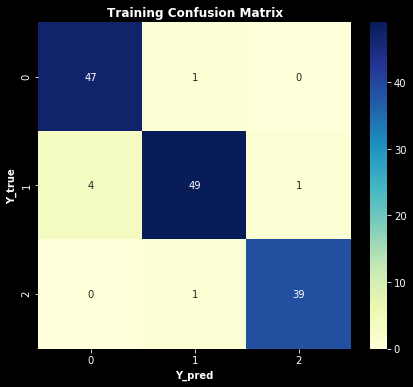

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(ax=ax,data=confusion_matrix(y_train, y_pred_train), cmap="YlGnBu",annot=True, fmt="d" )
ax.set_xlabel("Y_pred",fontweight='bold')
ax.set_ylabel("Y_true",fontweight='bold')
plt.title('Training Confusion Matrix',fontweight='bold')
plt.show()

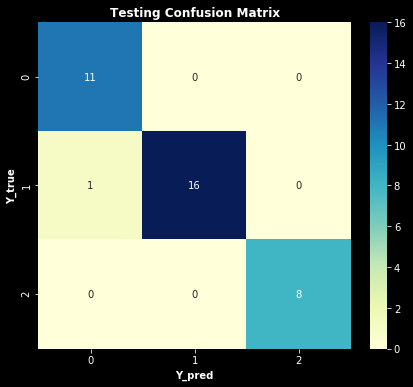

In [85]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(ax=ax,data=confusion_matrix(y_test, y_pred_test), cmap="YlGnBu",annot=True, fmt="d" )
ax.set_xlabel("Y_pred",fontweight='bold')
ax.set_ylabel("Y_true",fontweight='bold')
plt.title('Testing Confusion Matrix',fontweight='bold')
plt.show()

---
# <center>MLP using sklearn

In [86]:
## Prepare dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [90]:
from sklearn.neural_network import MLPClassifier

# Multi Layer Perceptron
clf = MLPClassifier(hidden_layer_sizes = (30 ), activation = 'logistic',
                    solver = 'adam', learning_rate_init = 0.005,
                    max_iter = 1000,random_state = 1)

clf.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [91]:
y_pred = clf.predict(X_test)
print('Model accuracy:',accuracy_score(y_test, y_pred))

Model accuracy: 0.9722222222222222


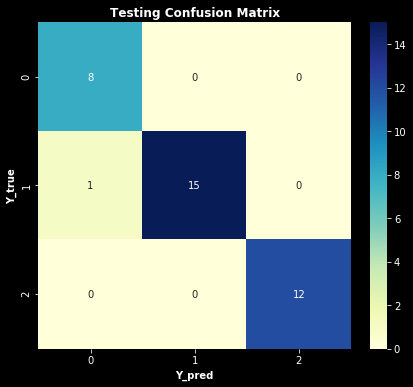

In [92]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(ax=ax,data=confusion_matrix(y_test, y_pred), cmap="YlGnBu",annot=True, fmt="d" )
ax.set_xlabel("Y_pred",fontweight='bold')
ax.set_ylabel("Y_true",fontweight='bold')
plt.title('Testing Confusion Matrix',fontweight='bold')
plt.show()

---

# <center> MLP using Tensorflow


In [138]:
## Prepare dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [144]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(24, activation='relu'),
    Dense(40, activation='relu'),
    Dense(60, activation='relu')
])

In [145]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [146]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
142/142 [==============================] - 0s 994us/sample - loss: 4.1464 - acc: 0.0000e+00
Epoch 2/100
142/142 [==============================] - 0s 78us/sample - loss: 4.1269 - acc: 0.0000e+00
Epoch 3/100
142/142 [==============================] - 0s 99us/sample - loss: 4.1140 - acc: 0.0000e+00
Epoch 4/100
142/142 [==============================] - 0s 92us/sample - loss: 4.1059 - acc: 0.0000e+00
Epoch 5/100
142/142 [==============================] - 0s 106us/sample - loss: 4.1010 - acc: 0.0000e+00
Epoch 6/100
142/142 [==============================] - 0s 106us/sample - loss: 4.0979 - acc: 0.0000e+00
Epoch 7/100
142/142 [==============================] - 0s 127us/sample - loss: 4.0962 - acc: 0.0000e+00
Epoch 8/100
142/142 [==============================] - 0s 92us/sample - loss: 4.0953 - acc: 0.0211
Epoch 9/100
142/142 [==============================] - 0s 106us/sample - loss: 4.0949 - acc: 0.0423
Epoch 10/100
142/142 [==============================] - 0s 99us/sample - los

142/142 [==============================] - 0s 78us/sample - loss: 0.2035 - acc: 0.9225
Epoch 83/100
142/142 [==============================] - 0s 106us/sample - loss: 0.1987 - acc: 0.9366
Epoch 84/100
142/142 [==============================] - 0s 99us/sample - loss: 0.1925 - acc: 0.9437
Epoch 85/100
142/142 [==============================] - 0s 106us/sample - loss: 0.1872 - acc: 0.9648
Epoch 86/100
142/142 [==============================] - 0s 92us/sample - loss: 0.1839 - acc: 0.9507
Epoch 87/100
142/142 [==============================] - 0s 113us/sample - loss: 0.1786 - acc: 0.9507
Epoch 88/100
142/142 [==============================] - 0s 92us/sample - loss: 0.1748 - acc: 0.9507
Epoch 89/100
142/142 [==============================] - 0s 92us/sample - loss: 0.1708 - acc: 0.9718
Epoch 90/100
142/142 [==============================] - 0s 85us/sample - loss: 0.1663 - acc: 0.9718
Epoch 91/100
142/142 [==============================] - 0s 92us/sample - loss: 0.1644 - acc: 0.9789
Epoch 92/1

In [147]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             multiple                  336       
_________________________________________________________________
dense_32 (Dense)             multiple                  1000      
_________________________________________________________________
dense_33 (Dense)             multiple                  2460      
Total params: 3,796
Trainable params: 3,796
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.evaluate(x = X_test, y = y_test)

36/36 [==============================] - 0s 2ms/sample - loss: 0.1154 - acc: 1.0000


[0.11544965373145209, 1.0]

In [149]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,1)

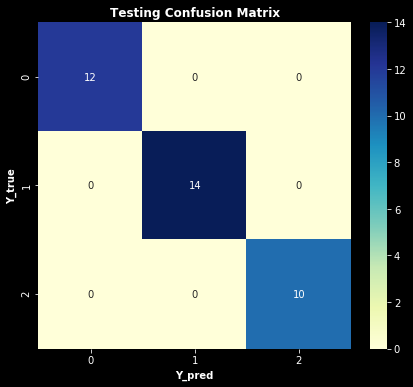

In [150]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(ax=ax,data=confusion_matrix(y_test, y_pred), cmap="YlGnBu",annot=True, fmt="d" )
ax.set_xlabel("Y_pred",fontweight='bold')
ax.set_ylabel("Y_true",fontweight='bold')
plt.title('Testing Confusion Matrix',fontweight='bold')
plt.show()